In [2]:
import seaborn as sns
from scipy import stats
from unidip import UniDip, dip
import pandas as pd
import matplotlib.font_manager

from scripts.path_utils import *
import scripts.fourier_utils as fourier_utils
import scripts.config as sconfig
from scripts.enums import Columns, Clusters, ContentType
from scripts.utils import hours_to_mins

In [91]:
sns.set(rc={'figure.figsize':(7,5), 
            'axes.facecolor':'white', 
            'axes.edgecolor': 'black',
            'axes.spines.top': False,
            'axes.spines.right': False,
            'figure.facecolor':'white', 
            'font.family': 'Helvetica',
            'xtick.bottom': True,
            'ytick.left': True,
            'xtick.color': 'black',
            'ytick.color': 'black',
            'legend.frameon': False
           })

In [92]:
FREQ=.25
colormap = {i:c for i, c in zip(fourier_utils.similarity_measures.keys(), sns.color_palette("tab10", len(fourier_utils.similarity_measures)))}
config = sconfig.Config(date_from = '2020-01-22')
country_config = sconfig.CountryConfig(LABEL='ITA', TIME_ZONE='Europe/Rome')
TYPE='all'

# Activity

In [93]:
activity_path_manager = ActivityPathManager(config, country_config.LABEL, TYPE)
activity_decomposer = fourier_utils.Decomposer(Columns.ACTIVITY_WEIGHTED.value, Columns.CLUSTER.value, list(Clusters) + ['total'],  list(Clusters), activity_path_manager)

## Single-frequency decomposition

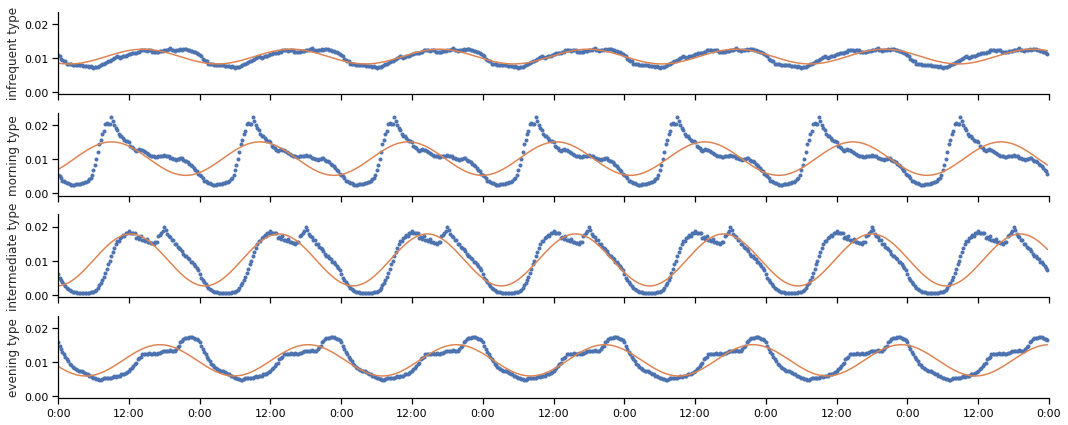

In [94]:
import matplotlib.font_manager # reload fonts
single_freq_params_activity = activity_decomposer.fit_single_freq(periods=7)
activity_decomposer.plot_single_fit(single_freq_params_activity);

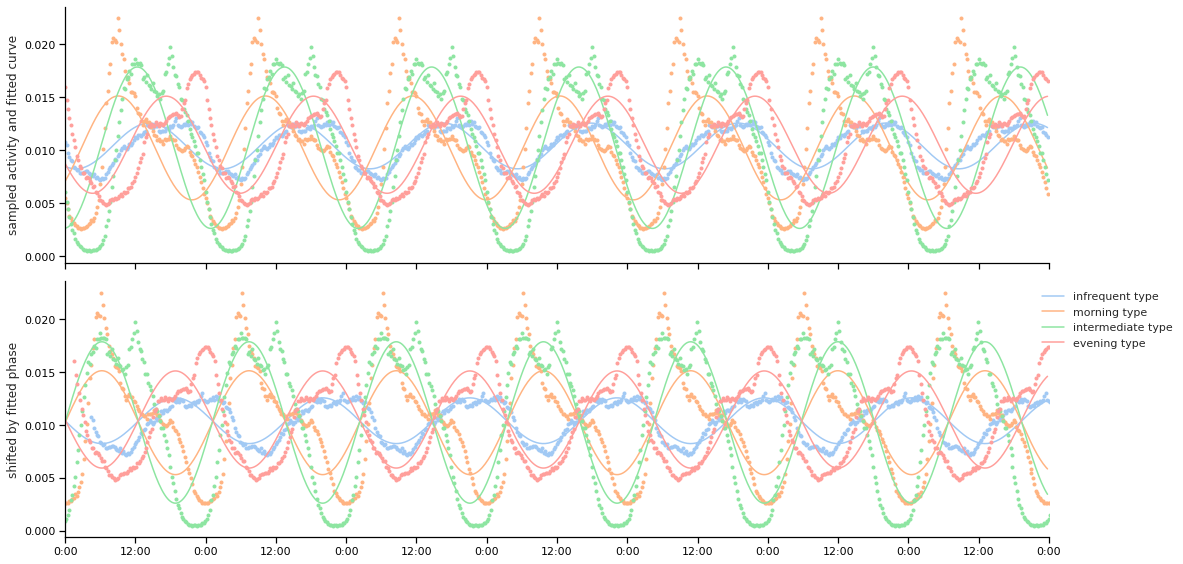

In [95]:
activity_decomposer.plot_aligned_single_fit(single_freq_params_activity);

In [96]:
params_df = pd.DataFrame.from_dict(single_freq_params_activity, orient='index')
params_df.columns=fourier_utils.SineParams._fields
params_df['phase_h'] = params_df['phase'] / FREQ
params_df

,amplitude,phase,offset,phase_h
infrequent type,-0.002162,-1.111420,0.010409,-4.445679
morning type,0.004910,0.699244,0.010223,2.796977
intermediate type,0.007630,1.509849,0.010243,6.039395
evening type,-0.004590,-0.393048,0.010524,-1.572193
total,-0.002163,-1.111774,0.010409,-4.447097


## Multiple-frequency decomposition
Here we're just fitting  a single sine curve. That doesn't do justice to the signals. Let's try to get a compound.

In [97]:
nmax_per_cluster=activity_decomposer.get_nmax_per_cluster()
nmax_per_cluster

{'infrequent type': 3,
 'morning type': 3,
 'intermediate type': 3,
 'evening type': 3,
 'total': 3}

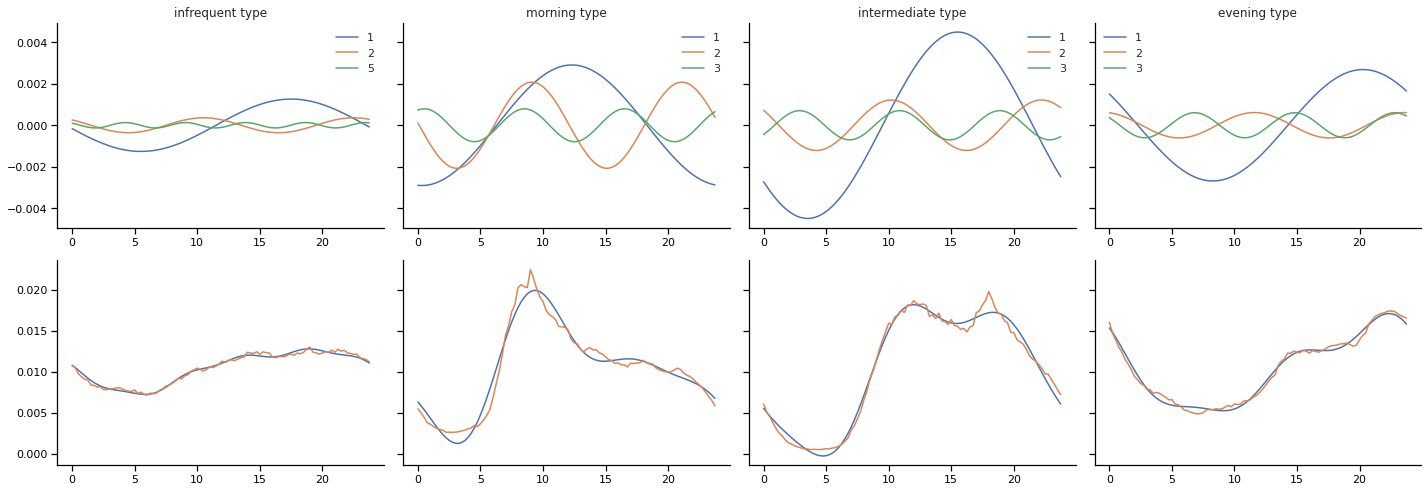

In [98]:
cluster_params_activity, cluster_recomb_activity = activity_decomposer.recombine_n_largest_frequencies(nmax_per_cluster)

In [99]:
waking_times = activity_decomposer.get_and_store_waking_times(cluster_recomb_activity)

<p id="SupplTab5">Supplementary Table 5:</p>

In [12]:
waking_times

{'infrequent type': (9.0, 1.0),
 'morning type': (6.0, 22.0),
 'intermediate type': (7.75, 23.75),
 'evening type': (11.5, 3.5),
 'total': (9.0, 1.0)}

<p id="SupplTab3">Supplementary Table 3</p>

In [13]:
activity_stats = activity_decomposer.get_and_store_stats(cluster_recomb_activity, waking_times)
activity_stats

max                                  min  \
                    clock time hrs past waking  activity clock time   
cluster           i                                                   
infrequent type   0      19.00           10.00  0.012791       5.75   
                  1      14.25            5.25  0.012025      16.00   
morning type      0       9.25            3.25  0.019919       3.25   
                  1      16.75           10.75  0.011577      15.00   
intermediate type 0      12.00            4.25  0.018190       4.75   
                  1      18.25           10.50  0.017247      15.50   
evening type      0      22.25           10.75  0.017098       9.00   
                  1      16.00            4.50  0.012661      17.25   
total             0      19.00           10.00  0.012791       5.75   
                  1      14.25            5.25  0.012026      16.00   

                                               
                    hrs past waking  activity  
cluster           i                            
infrequent type   0           20.75  0.007233  
                  1            7.00  0.011802  
morning type      0           21.25  0.001255  
                  1            9.00  0.011281  
intermediate type 0           21.00 -0.000284  
                  1            7.75  0.015886  
evening type      0           21.50  0.005244  
                  1            5.75  0.012583  
total             0           20.75  0.007232  
                  1            7.00  0.011802

In [14]:
activity_recomb = pd.DataFrame(cluster_recomb_activity.stack(), columns=[activity_decomposer.y_col])
activity_recomb.index.names = ['clock time', 'cluster']
activity_recomb.reset_index()
fourier_utils.align_signal_by_waking(activity_recomb, waking_times)
fourier_utils.align_signal_by_waking(activity_decomposer.signal_df, waking_times)

<p id="Figure2a">Figure 2a: activity by time of day</p>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


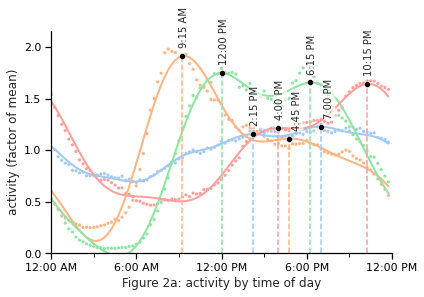

In [15]:
g = activity_decomposer.plot_aligned(activity_recomb, activity_stats, by="clock time", factor_of_baseline=True, hatch_area=False, ampm=True)
g.set_xlabel("Figure 2a: activity by time of day");

<p id="Figure2b">Figure 2b: activity by waking time</p>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


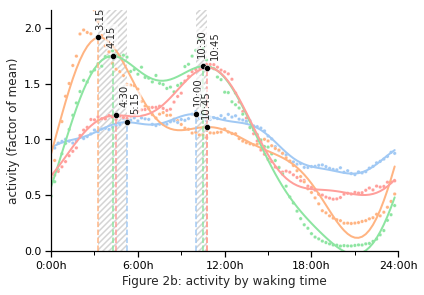

In [16]:
g = activity_decomposer.plot_aligned(activity_recomb, activity_stats, by="hrs past waking", factor_of_baseline=True, hatch_area=True, ampm=False)
g.set_xlabel("Figure 2b: activity by waking time");

# Ratio of potentially machinated content

In [17]:
ratio_path_manager = MachinatedPathManager(config, country_config.LABEL, TYPE)
ratio_decomposer = fourier_utils.Decomposer(Columns.RATIO_BY_USER.value, Columns.CLUSTER.value, list(Clusters) + ['total'], list(Clusters), ratio_path_manager)
ratio_decomposer.smooth_over_signal()

## Single-frequency decomposition

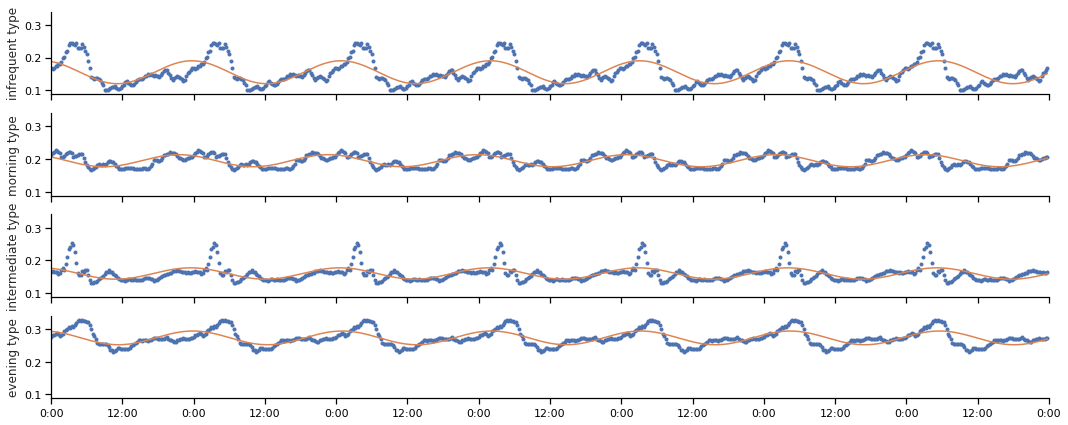

In [18]:
import matplotlib.font_manager # reload fonts
single_freq_params_ratio = ratio_decomposer.fit_single_freq(periods=7)
ratio_decomposer.plot_single_fit(single_freq_params_ratio);

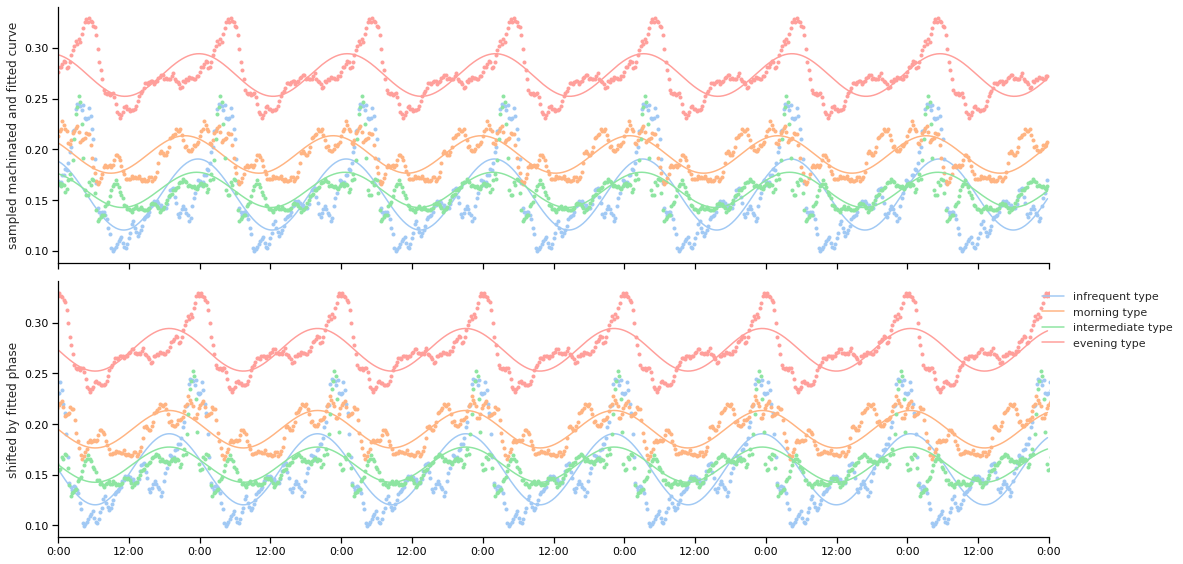

In [19]:
fig, axes = ratio_decomposer.plot_aligned_single_fit(single_freq_params_ratio)

In [20]:
params_df = pd.DataFrame.from_dict(single_freq_params_ratio, orient='index')
params_df.columns=fourier_utils.SineParams._fields
params_df['phase_h'] = params_df['phase'] / FREQ
params_df

,amplitude,phase,offset,phase_h
infrequent type,-0.035031,1.214598,0.155442,4.858392
morning type,-0.018477,0.662928,0.194945,2.651713
intermediate type,-0.017379,1.159530,0.159995,4.638120
evening type,-0.021012,1.259628,0.273285,5.038513
total,-0.035024,1.214424,0.155489,4.857696


## Multiple-frequency decomposition

In [21]:
nmax_per_cluster=ratio_decomposer.get_nmax_per_cluster(n=(1,4))
nmax_per_cluster

{'infrequent type': 2,
 'morning type': 2,
 'intermediate type': 3,
 'evening type': 2,
 'total': 2}

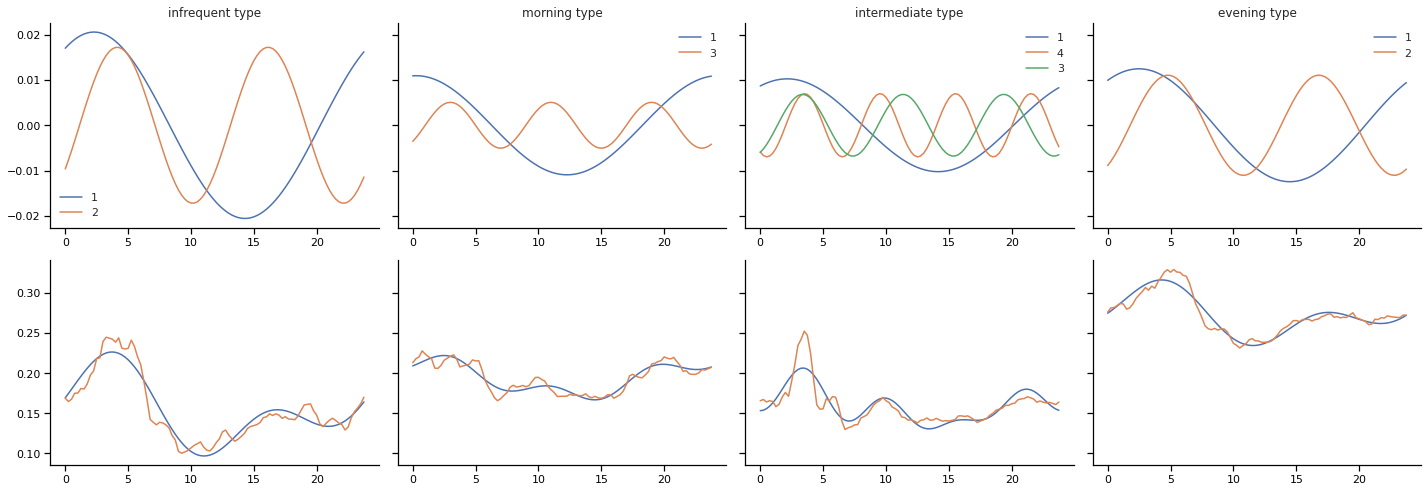

In [22]:
cluster_params_ratio, cluster_recomb_ratio = ratio_decomposer.recombine_n_largest_frequencies(nmax_per_cluster)

<p id="SupplTab8">Supplementary Table 8</p>

In [23]:
ratio_stats = ratio_decomposer.get_and_store_stats(cluster_recomb_ratio, waking_times)
ratio_stats

max                                   min  \
                    clock time hrs past waking machinated clock time   
cluster           i                                                    
infrequent type   0       3.75           18.75   0.226298      11.00   
                  1      16.75            7.75   0.154140      21.00   
morning type      0       2.50           20.50   0.221874      14.50   
                  1      20.00           14.00   0.210908       8.00   
                  2      10.50            4.50   0.184023      22.50   
intermediate type 0       3.50           19.75   0.206187      13.50   
                  1      21.25           13.50   0.179851       7.00   
                  2       9.75            2.00   0.168747      17.25   
                  3      16.25            8.50   0.141703        NaN   
evening type      0       4.25           16.75   0.316222      11.50   
                  1      17.50            6.00   0.275688      21.75   
total             0       3.75           18.75   0.226319      11.00   
                  1      16.75            7.75   0.154181      21.00   

                                                
                    hrs past waking machinated  
cluster           i                             
infrequent type   0            2.00   0.096477  
                  1           12.00   0.133466  
morning type      0            8.50   0.166552  
                  1            2.00   0.177519  
                  2           16.50   0.204404  
intermediate type 0            5.75   0.130356  
                  1           23.25   0.140070  
                  2            9.50   0.140968  
                  3             NaN        NaN  
evening type      0            0.00   0.234338  
                  1           10.25   0.261837  
total             0            2.00   0.096539  
                  1           12.00   0.133533

In [24]:
ratio_recomb = pd.DataFrame(cluster_recomb_ratio.stack(), columns=[ratio_decomposer.y_col])
ratio_recomb.index.names = ['clock time', 'cluster']
ratio_recomb.reset_index()
fourier_utils.align_signal_by_waking(ratio_recomb, waking_times)
fourier_utils.align_signal_by_waking(ratio_decomposer.signal_df, waking_times)

In [25]:
ratio_stats

max                                   min  \
                    clock time hrs past waking machinated clock time   
cluster           i                                                    
infrequent type   0       3.75           18.75   0.226298      11.00   
                  1      16.75            7.75   0.154140      21.00   
morning type      0       2.50           20.50   0.221874      14.50   
                  1      20.00           14.00   0.210908       8.00   
                  2      10.50            4.50   0.184023      22.50   
intermediate type 0       3.50           19.75   0.206187      13.50   
                  1      21.25           13.50   0.179851       7.00   
                  2       9.75            2.00   0.168747      17.25   
                  3      16.25            8.50   0.141703        NaN   
evening type      0       4.25           16.75   0.316222      11.50   
                  1      17.50            6.00   0.275688      21.75   
total             0       3.75           18.75   0.226319      11.00   
                  1      16.75            7.75   0.154181      21.00   

                                                
                    hrs past waking machinated  
cluster           i                             
infrequent type   0            2.00   0.096477  
                  1           12.00   0.133466  
morning type      0            8.50   0.166552  
                  1            2.00   0.177519  
                  2           16.50   0.204404  
intermediate type 0            5.75   0.130356  
                  1           23.25   0.140070  
                  2            9.50   0.140968  
                  3             NaN        NaN  
evening type      0            0.00   0.234338  
                  1           10.25   0.261837  
total             0            2.00   0.096539  
                  1           12.00   0.133533

<p id="Figure2c">Figure 2c: ratio by time of day</p>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


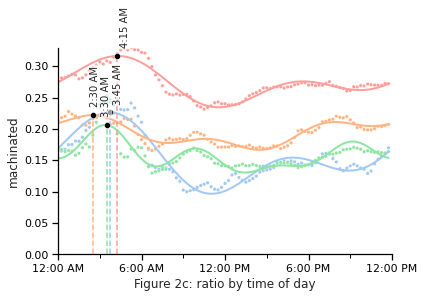

In [26]:
g = ratio_decomposer.plot_aligned(ratio_recomb, ratio_stats, by="clock time", factor_of_baseline=False, hatch_area=False, ampm=True, annotate=1)
g.set_xlabel("Figure 2c: ratio by time of day");

<p id="Figure2d">Figure 2d: ratio by waking time</p>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


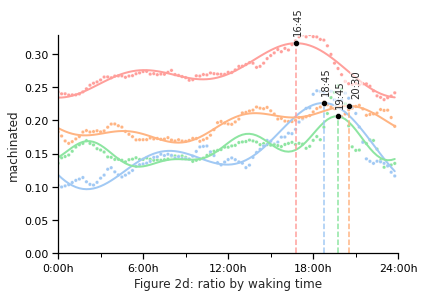

In [27]:
g = ratio_decomposer.plot_aligned(ratio_recomb, ratio_stats, by="hrs past waking", factor_of_baseline=False, hatch_area=False, ampm=False, annotate=1)
g.set_xlabel("Figure 2d: ratio by waking time");

# Save curves

In [28]:
activity_path_manager.save(activity_recomb, "fourier")
ratio_path_manager.save(ratio_recomb, "fourier")

In [29]:
import pickle
with open(get_waking_time_path(config, country_config, TYPE), 'wb') as f:
    pickle.dump(waking_times, f, pickle.HIGHEST_PROTOCOL)

# Statistics

## Normal distribution

In [30]:
shapiro_df=pd.DataFrame(None, index=list(Clusters) + ['total'],
                        columns=pd.MultiIndex.from_product((
                            ["activity (coarse)", "ratio (coarse)", "activity (smooth)", "ratio (smooth)"],
                            ["Statistic", "P-Value"])))

In [31]:
for c in shapiro_df.index:
    stat, p = stats.shapiro(activity_decomposer.signal_df.xs(c, level=activity_decomposer.cluster_col)[activity_decomposer.y_col])
    shapiro_df.loc[c, "activity (coarse)"] = stat, p
    stat, p = stats.shapiro(activity_recomb.xs(c, level=activity_decomposer.cluster_col)[activity_decomposer.y_col])
    shapiro_df.loc[c, "activity (smooth)"] = stat, p
    stat, p = stats.shapiro(ratio_decomposer.signal_df.xs(c, level=ratio_decomposer.cluster_col)[ratio_decomposer.y_col])
    shapiro_df.loc[c, "ratio (coarse)"] = stat, p
    stat, p = stats.shapiro(ratio_recomb.xs(c, level=ratio_decomposer.cluster_col)[ratio_decomposer.y_col])
    shapiro_df.loc[c, "ratio (smooth)"] = stat, p

In [32]:
shapiro_df_style = (shapiro_df
     .style
     .format('{:.3f}', subset=pd.IndexSlice[:, pd.IndexSlice[:, "Statistic"]])
     .format('{:.1e}', subset=pd.IndexSlice[:, pd.IndexSlice[:, "P-Value"]])
     .applymap(lambda v: 'font-weight: bold;' if (v <0.05)  else None, subset=pd.IndexSlice[:, pd.IndexSlice[:, "P-Value"]]))
shapiro_df_style

The data is not normally distributed.

## Distribution size of ratios of potentially machinated content across clusters

In [33]:
mannwhitneyu_df = pd.DataFrame(None, index=list(Clusters)[:-1], columns=pd.MultiIndex.from_product((list(Clusters)[1:], ("Statistic", "P-Value"))))
for i,c1 in enumerate(Clusters):
    for c2 in list(Clusters)[i:]:
        if c1!=c2:
            s,p=stats.mannwhitneyu(*[ratio_decomposer.signal_df.xs(c, level=ratio_decomposer.cluster_col)[ratio_decomposer.y_col] for c in (c1, c2)], alternative='less')
            mannwhitneyu_df.loc[c1,(c2, "Statistic")], mannwhitneyu_df.loc[c1,(c2, "P-Value")] = s,p

<p id="Table1">Table 1</p>

In [34]:
mannwhitneyu_df_style = (
    mannwhitneyu_df
    .style
    .format('{:,.1e}', na_rep="-")
    .format('{:,.0f}', na_rep="-", subset=pd.IndexSlice[:, pd.IndexSlice[:, "Statistic"]])
    .applymap(lambda v: 'font-weight: bold;' if (v <0.05)  else None, subset=pd.IndexSlice[:, pd.IndexSlice[:, "P-Value"]])
 )
mannwhitneyu_df_style

In [35]:
ratio_path_manager.to_latex(
    mannwhitneyu_df_style,
    label='mannwhitneyu_machinated_per_cluster',
    caption="One-sided Mann-Whitney U test indicating whether the distribution of ratios of potentially machinated content throughout the day underlying the cluster named in the row is greater than the distribution underlying the cluster in the column.")

Evening types spread most potentially machinated content,  infrequent types the least.

# Bimodality

In [36]:
dip_df = pd.DataFrame(0, index=list(Clusters) + ['total'], columns=pd.MultiIndex.from_product((("coarse", "smooth"), ("Statistic", "P-value"))))

In [37]:
for c in list(Clusters) + ['total']:
    tmp_s=activity_recomb.xs(c, level=activity_decomposer.cluster_col)[activity_decomposer.y_col]
    tmp_c=activity_decomposer.signal_df.xs(c, level=activity_decomposer.cluster_col)[activity_decomposer.y_col]
    d_s, d_c = dip.diptst(tmp_s), dip.diptst(tmp_c)
    dip_df.loc[c]=d_s[:2] + d_c[:2]

<p id="SupplTab4">Supplementary Table 4:</p>

In [38]:
dip_df_style = (
    dip_df.loc[list(Clusters)]
    .rename(index={c:c.split()[0] for c in dip_df.index})
    .style
    .format('{:.3f}')
    .applymap(lambda v: 'font-weight: bold;' if (v <0.05)  else None, subset=pd.IndexSlice[:, pd.IndexSlice[:, "P-value"]])
)
dip_df_style

In [39]:
ratio_path_manager.to_latex(
    dip_df_style,
    'dip_bimodality',
    "Dip-test for unimodality of user activity curves."
)